In [1]:
#Mission: It is your job to predict if a passenger survived the sinking of the Titanic or not. For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.
#Evaluation: Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
#data を取得
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [3]:
#欠損値の状況を把握
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


/Users/tanakamarunatsurou/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


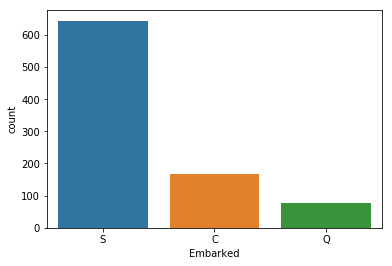

In [4]:
#Cabinは削除
df_train = df_train.drop(['Cabin'], axis=1)

#Embarked,二個だけなので最も多い値を入れとく
sns.countplot(x='Embarked', data=df_train)

In [5]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")

#イニシャルから、age予測
df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')


pd.crosstab(df_train.Initial,df_train.Sex).T.style.background_gradient(cmap='summer_r')

/Users/tanakamarunatsurou/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [6]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

df_train.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [7]:
#Age補充
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

In [8]:
#欠損値処理完了
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Initial,0,0.0
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0


In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [10]:
#カテゴリデータ(Name,Sex,Ticket,Embarked,Initial)の処理
#関係なさそうなやつは削除
df_train = df_train.drop(['PassengerId','Name','Ticket'], axis=1)

#SEX
sex_dum = pd.get_dummies(df_train['Sex'])
df_train = pd.concat((df_train,sex_dum),axis=1)
df_train = df_train.drop('Sex',axis=1)
 #Embarked
emb_dum = pd.get_dummies(df_train['Embarked'])
df_train = pd.concat((df_train,emb_dum),axis=1)
df_train = df_train.drop('Embarked',axis=1)

In [11]:
#Family sizeを錬成
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train = df_train.drop(['SibSp','Parch'], axis=1)

In [12]:
#Initial
int_dum = pd.get_dummies(df_train['Initial'])
df_train = pd.concat((df_train,int_dum),axis=1)
df_train = df_train.drop('Initial',axis=1)

In [13]:
df_train.head()

,Survived,Pclass,Age,Fare,female,male,C,Q,S,FamilySize,Master,Miss,Mr,Mrs,Other
0,0,3,22.0,7.2500,0,1,0,0,1,2,0,0,1,0,0
1,1,1,38.0,71.2833,1,0,1,0,0,2,0,0,0,1,0
2,1,3,26.0,7.9250,1,0,0,0,1,1,0,1,0,0,0
3,1,1,35.0,53.1000,1,0,0,0,1,2,0,0,0,1,0
4,0,3,35.0,8.0500,0,1,0,0,1,1,0,0,1,0,0


In [15]:
#乗船地(Embarked)は関係ない、Pclass =Fareでは？という前提で、それ以外でrfcしてみる
df_train_pickup = df_train.loc[:,['Pclass','Age','female','male','FamilySize','Master','Miss','Mr','Mrs','Other']]
X_1 = df_train_pickup.values
y_1 = df_train.loc[:,['Survived']].values
y_1 = y_1.reshape(-1)

from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(n_estimators = 10, random_state=0)

from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y_1, random_state = 0, test_size=0.3)

rfc_1.fit(X_1_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
#特徴量を減らしてみる
df_train_pickup_2 = df_train.loc[:,['Pclass','Age','female','FamilySize','Master']]
X_2 = df_train_pickup_2.values
y_1 = df_train.loc[:,['Survived']].values
y_1 = y_1.reshape(-1)

from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(n_estimators = 10, random_state=0)

from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_train, y_test = train_test_split(X_2, y_1, random_state = 0, test_size=0.3)

rfc_2.fit(X_2_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
y_pred = rfc_1.predict(X_1_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.794776119403


In [15]:
y_pred_2 = rfc_2.predict(X_2_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_2))

0.791044776119


In [17]:
param_grid ={"n_estimators": [i for i in range(30, 80, 10)],
            "max_depth": [i for i in range(2,5)]}

from sklearn.grid_search import GridSearchCV
rfc_1 = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rfc_1.fit(X_1_train, y_train)

/Users/tanakamarunatsurou/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/tanakamarunatsurou/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 40, 50, 60, 70], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [17]:
param_grid ={"n_estimators": [i for i in range(30, 80, 10)],
            "max_depth": [i for i in range(2,5)]}

from sklearn.grid_search import GridSearchCV
rfc_2 = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rfc_2.fit(X_2_train, y_train)

/Users/tanakamarunatsurou/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/tanakamarunatsurou/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 40, 50, 60, 70], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [41]:
print("Best model:\n{}\n".format(rfc_1.best_estimator_))
print("Best parameter:\n{}\n".format(rfc_1.best_params_))

AttributeError: 'RandomForestClassifier' object has no attribute 'best_estimator_'

In [18]:
print("Best model_2:\n{}\n".format(rfc_2.best_estimator_))
print("Best parameter_2:\n{}\n".format(rfc_2.best_params_))

Best model_2:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Best parameter_2:
{'max_depth': 4, 'n_estimators': 50}



In [19]:
rfc_3 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rfc_3.fit(X_2,y_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
rfc_2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rfc_2.fit(X_1, y_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
#Trainへの適用
df_test = df_test.drop(['Cabin','Ticket'], axis=1)

#Family sizeを錬成
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test = df_test.drop(['SibSp','Parch'], axis=1)

#Fareを補充
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

#Ageを補充
df_test['Initial']=0
for i in df_test:
    df_test['Initial']=df_test.Name.str.extract('([A-Za-z]+)\.')

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)

df_test.groupby('Initial')['Age'].mean() 

/Users/tanakamarunatsurou/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Initial
Master     7.406471
Miss      21.774844
Mr        32.114130
Mrs       38.904762
Other     42.750000
Name: Age, dtype: float64

In [23]:
#Ageを補充
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age']=32
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age']=39
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age']=7
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age']=22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age']=43

In [24]:
#SEX
sex_dum = pd.get_dummies(df_test['Sex'])
df_test = pd.concat((df_test,sex_dum),axis=1)
df_test = df_test.drop('Sex',axis=1)
 #Embarked
emb_dum = pd.get_dummies(df_test['Embarked'])
df_test = pd.concat((df_test,emb_dum),axis=1)
df_test = df_test.drop('Embarked',axis=1)
#Initial
int_dum = pd.get_dummies(df_test['Initial'])
df_test = pd.concat((df_test,int_dum),axis=1)
df_test = df_test.drop('Initial',axis=1)

In [25]:
df_test_pickup = df_test.loc[:,['Pclass','Age','female','male','FamilySize','Master','Miss','Mr','Mrs','Other']]
X_test = df_test_pickup.values

In [27]:
df_test_pickup_2 = df_test.loc[:,['Pclass','Age','female','FamilySize','Master']]
X_test_2 = df_test_pickup_2.values

In [26]:
test_pred = rfc_2.predict(X_test)

In [28]:
test_pred_2 = rfc_3.predict(X_test_2)

In [27]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": test_pred
    })
submission.to_csv('submission1946.csv',index=False)

In [29]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": test_pred_2
    })
submission.to_csv('submission2115.csv',index=False)